In [1]:
import sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sys.path.insert(1, '../src/')
pd.set_option("display.max_columns", 999)

import models
import plots
import utils

In [2]:
def make_final_opinions_analysis(model):
    n_runs = 1000
    print(f'Numero de runs: {n_runs}')
    
    data = model.make_multiple_runs(n_runs = n_runs, n_max_iter_per_run = 10_000)
    final_opinions = pd.concat([data[run]['data'].tail(1).reset_index() for run in data.keys()], ignore_index = True)
    

    convergence = final_opinions[['actor_1', 'index']]

    convergence = convergence.groupby('actor_1').agg({'index':['count', 'mean', 'median', 'std']})
    convergence.columns = convergence.columns.droplevel()
    convergence.index = convergence.index.rename('opiniao')
    summary = convergence.copy()
    
    summary['opinions_prob'] = model.opinions_probabilities
    summary['random'] = model.randomize_start_opinions
    summary['influence_mode'] = model.influence_mode
    
    print('\n',summary,'\n')
    
    for i in [1,-1]:
        convergence = final_opinions[final_opinions.actor_1 == i].iloc[:, 0]        
        sns.kdeplot(convergence)
        plt.legend(labels=['1','-1'])

    plt.show()

    for i in [1,-1]:
        sns.displot(final_opinions[final_opinions.actor_1 == i].iloc[:, 0], bins = 20)
        plt.legend(labels=[i])
        plt.show()
        
    return data, summary.reset_index()

# Modelo Votante

O objetivo desse estudo é observar o tempo de convergencia de redes com 10 atores para as combinações das seguintes variáveis
- Desenho do grafo (3 categorias: fila, circular, todos influenciam todos)
- probabilidade para cada opinião inicial (-1, 1): (0.5, 0.5) e (0.7, 0.3)
- alocação das opiniões: aleatória ou separada


--------------------------------------

## atores em fila
## probabilidades das opiniões iniciais: (50%, 50%)
## alocação aleatória

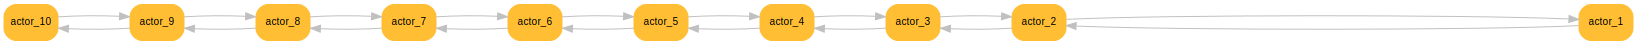

In [3]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'linear_neighbors',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [5/10,5/10],
                              randomize_start_opinions= True,
                    
                              )

model.make_graph()

Numero de runs: 1000

          count        mean  median         std  opinions_prob  random  \
opiniao                                                                 
-1         509  164.836935     105  173.298440            0.5    True   
 1         491  144.181263     101  135.067291            0.5    True   

           influence_mode  
opiniao                    
-1       linear_neighbors  
 1       linear_neighbors   



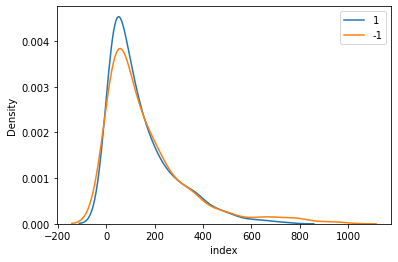

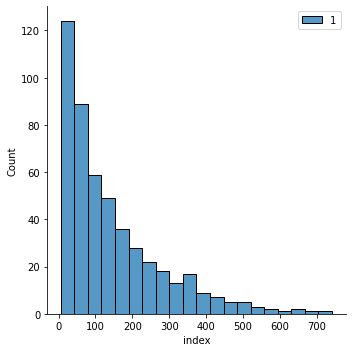

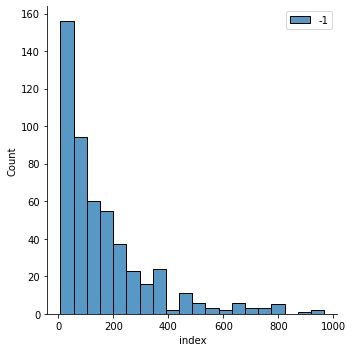

In [10]:
data_1 = make_final_opinions_analysis(model)

-------------

## atores em fila
## probabilidades das opiniões iniciais: (50%, 50%)
## alocação separada

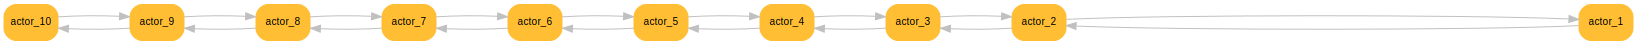

In [9]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'linear_neighbors',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [5/10,5/10],
                              randomize_start_opinions= False,
                              )

model.make_graph()

Numero de runs: 1000

          count        mean  median         std  opinions_prob  random  \
opiniao                                                                 
-1         503  206.248509     163  161.835647            0.5   False   
 1         497  198.372233     142  168.581619            0.5   False   

           influence_mode  
opiniao                    
-1       linear_neighbors  
 1       linear_neighbors   



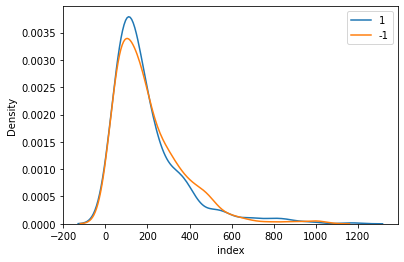

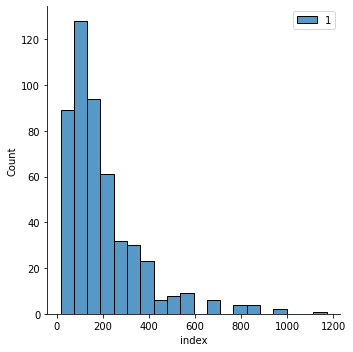

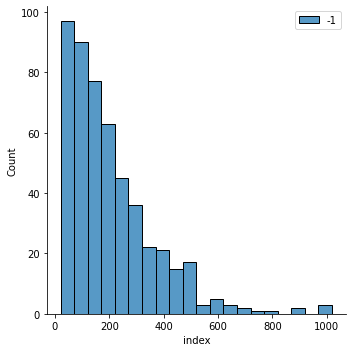

In [12]:
data_2 = make_final_opinions_analysis(model)

------------------

## atores em fila
## probabilidades das opiniões iniciais: (70%, 30%)
## alocação aleatória

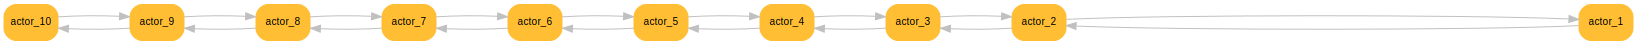

In [10]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'linear_neighbors',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [7/10,3/10],
                              randomize_start_opinions= True,
                              )

model.make_graph()

Numero de runs: 1000

          count        mean  median         std  opinions_prob  random  \
opiniao                                                                 
-1         711   99.457103      44  134.828981            0.7    True   
 1         289  194.543253     149  155.471703            0.3    True   

           influence_mode  
opiniao                    
-1       linear_neighbors  
 1       linear_neighbors   



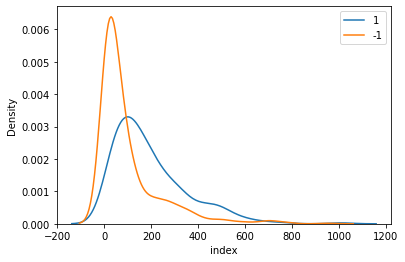

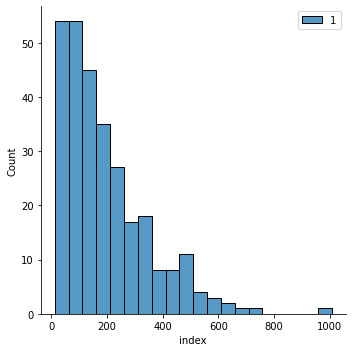

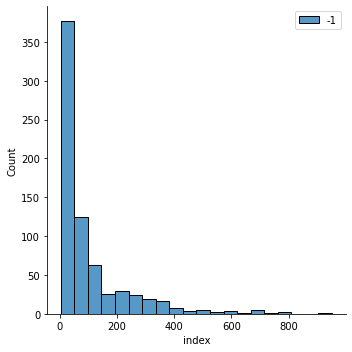

In [14]:
data_3 = make_final_opinions_analysis(model)

------------------

## atores em fila
## probabilidades das opiniões iniciais: (70%, 30%)
## alocação separada

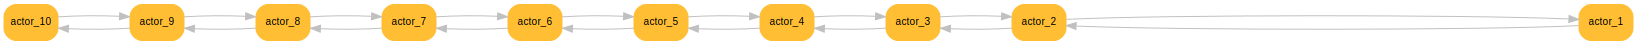

In [11]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'linear_neighbors',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [7/10,3/10],
                              randomize_start_opinions= False,
                              )

model.make_graph()

Numero de runs: 1000

          count        mean  median         std  opinions_prob  random  \
opiniao                                                                 
-1         738  138.127371    80.0  153.929957            0.7   False   
 1         262  268.610687   204.5  199.559191            0.3   False   

           influence_mode  
opiniao                    
-1       linear_neighbors  
 1       linear_neighbors   



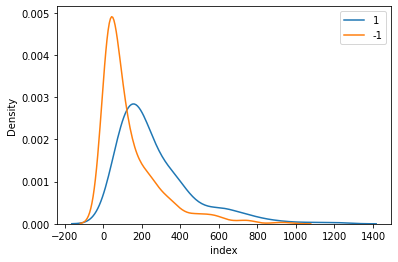

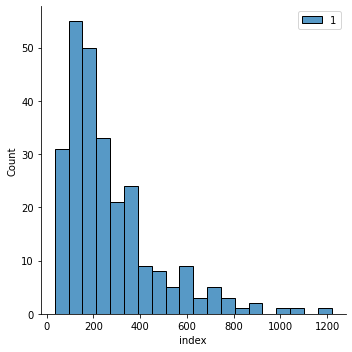

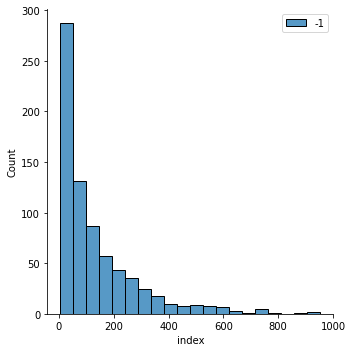

In [16]:
data_4 = make_final_opinions_analysis(model)

------------------

## atores em circulo
## probabilidades das opiniões iniciais: (50%, 50%)
## alocação aleatória

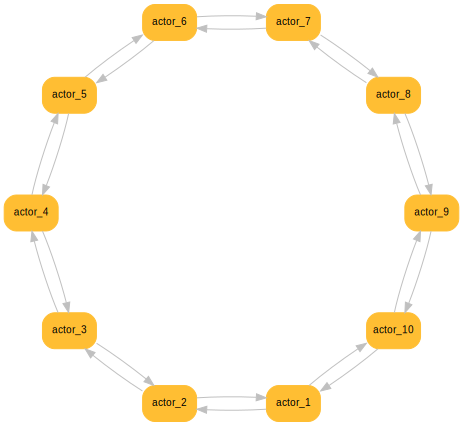

In [12]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'circular_neighbors',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [5/10,5/10],
                              randomize_start_opinions= True,
                              #initial_opinions_list = [-1,-1,-1,-1,-1,1,1,1,1,1]
                              )

model.make_graph()

Numero de runs: 1000

          count        mean  median        std  opinions_prob  random  \
opiniao                                                                
-1         483  110.942029      84  92.960086            0.5    True   
 1         517  106.367505      80  94.038506            0.5    True   

             influence_mode  
opiniao                      
-1       circular_neighbors  
 1       circular_neighbors   



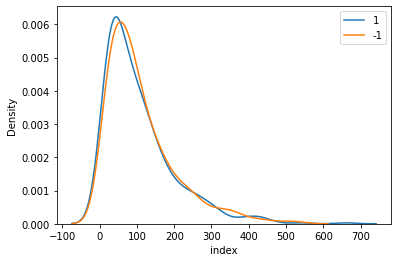

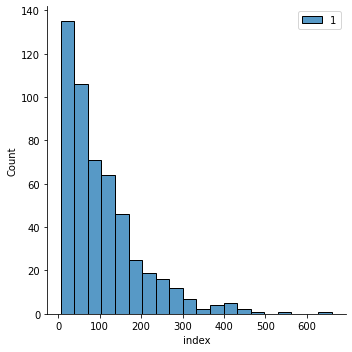

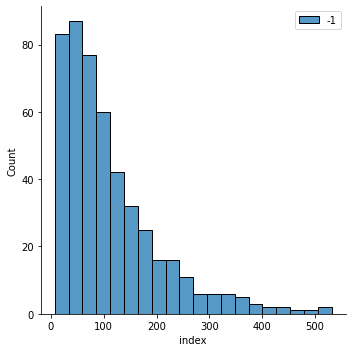

In [18]:
data_5 = make_final_opinions_analysis(model)

-------------

## atores em circulo
## probabilidades das opiniões iniciais: (50%, 50%)
## alocação separada

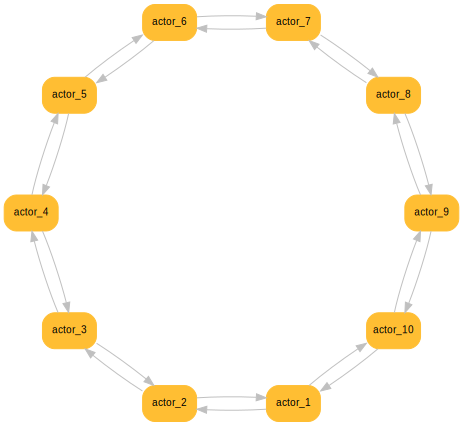

In [13]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'circular_neighbors',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [5/10,5/10],
                              randomize_start_opinions= False,
                              )

model.make_graph()

Numero de runs: 1000

          count        mean  median        std  opinions_prob  random  \
opiniao                                                                
-1         495  116.006061      88  94.079205            0.5   False   
 1         505  122.562376      98  94.206969            0.5   False   

             influence_mode  
opiniao                      
-1       circular_neighbors  
 1       circular_neighbors   



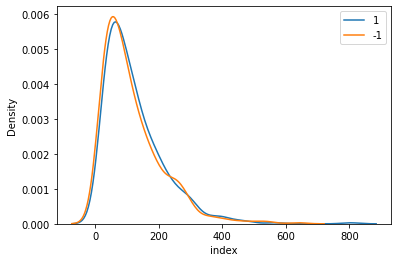

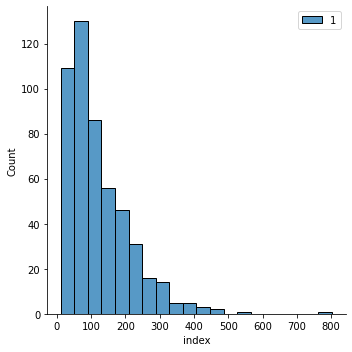

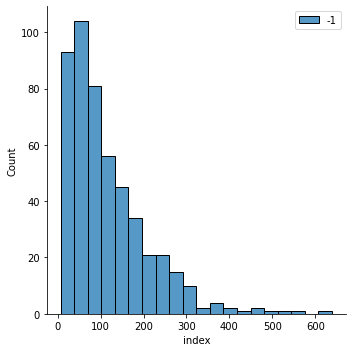

In [20]:
data_6 = make_final_opinions_analysis(model)

------------------

## atores em circulo
## probabilidades das opiniões iniciais: (70%, 30%)
## alocação aleatória

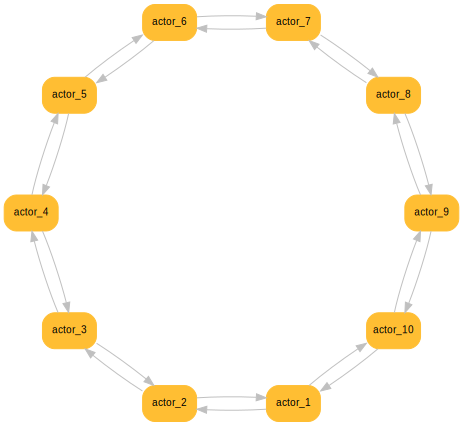

In [14]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'circular_neighbors',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [7/10,3/10],
                              randomize_start_opinions= True,
                              )

model.make_graph()

Numero de runs: 1000

          count        mean  median         std  opinions_prob  random  \
opiniao                                                                 
-1         680   75.977941    41.5   94.338786            0.7    True   
 1         320  137.471875   110.5  100.269195            0.3    True   

             influence_mode  
opiniao                      
-1       circular_neighbors  
 1       circular_neighbors   



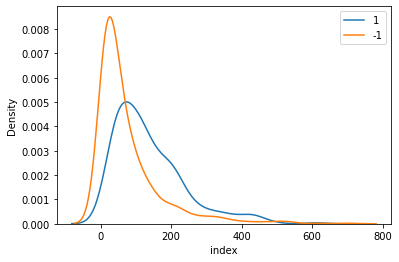

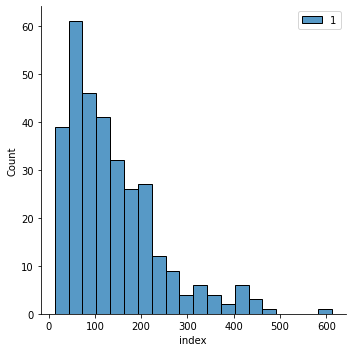

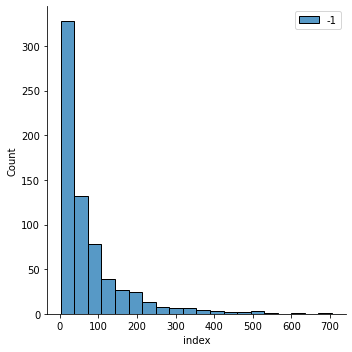

In [22]:
data_7 = make_final_opinions_analysis(model)

------------------

## atores em circulo
## probabilidades das opiniões iniciais: (70%, 30%)
## alocação separada

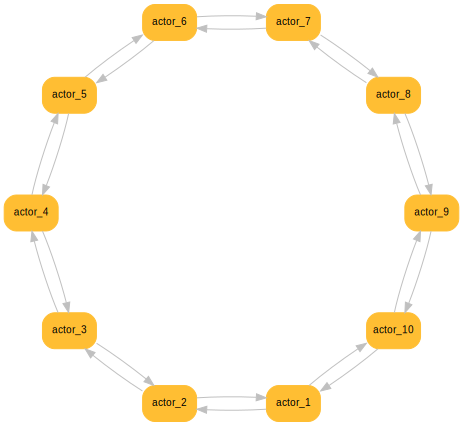

In [15]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'circular_neighbors',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [7/10,3/10],
                              randomize_start_opinions= False,
                              )

model.make_graph()

Numero de runs: 1000

          count        mean  median         std  opinions_prob  random  \
opiniao                                                                 
-1         701   91.649073      52  101.116296            0.7   False   
 1         299  148.903010     118  108.384324            0.3   False   

             influence_mode  
opiniao                      
-1       circular_neighbors  
 1       circular_neighbors   



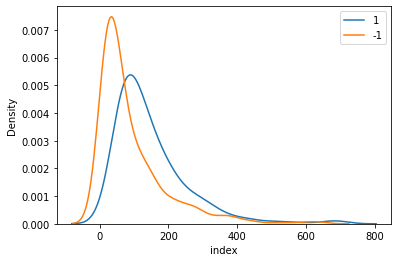

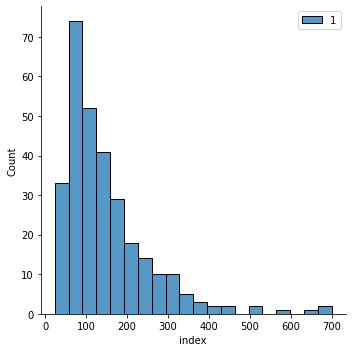

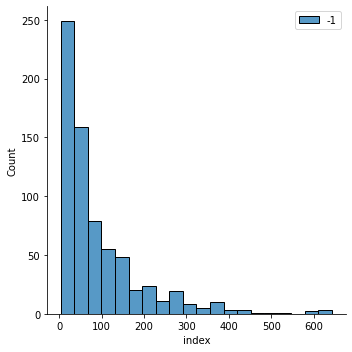

In [24]:
data_8 = make_final_opinions_analysis(model)

## todos influenciam todos
## probabilidades das opiniões iniciais: (50%, 50%)
## alocação aleatória

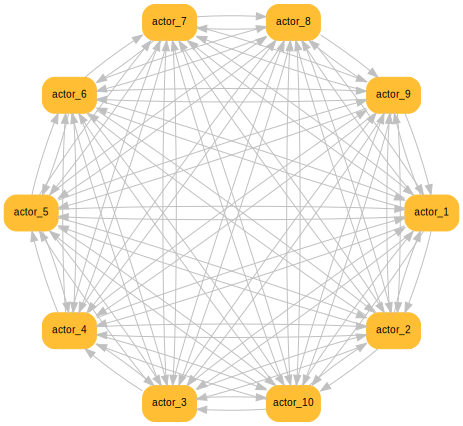

In [16]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'all',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [5/10,5/10],
                              randomize_start_opinions= True,
                              #initial_opinions_list = [-1,-1,-1,-1,-1,1,1,1,1,1]
                              )

model.make_graph()

Numero de runs: 1000

          count       mean  median        std  opinions_prob  random  \
opiniao                                                               
-1         504  56.099206      43  45.719193            0.5    True   
 1         496  62.945565      45  54.171101            0.5    True   

        influence_mode  
opiniao                 
-1                 all  
 1                 all   



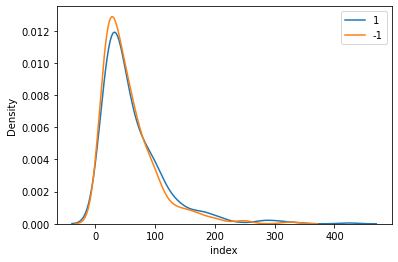

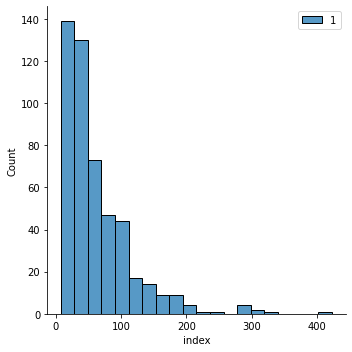

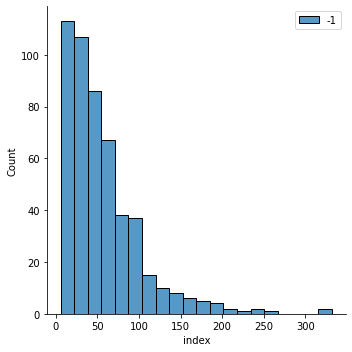

In [26]:
data_9 = make_final_opinions_analysis(model)

-------------

## todos influenciam todos
## probabilidades das opiniões iniciais: (50%, 50%)
## alocação separada

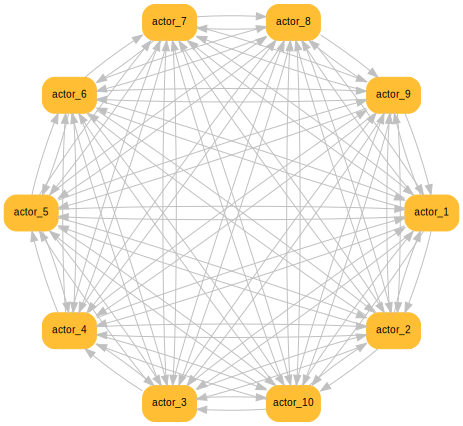

In [17]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'all',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [5/10,5/10],
                              randomize_start_opinions= False,
                              )

model.make_graph()

Numero de runs: 1000

          count       mean  median        std  opinions_prob  random  \
opiniao                                                               
-1         509  56.960707      43  46.795526            0.5   False   
 1         491  57.723014      44  45.033464            0.5   False   

        influence_mode  
opiniao                 
-1                 all  
 1                 all   



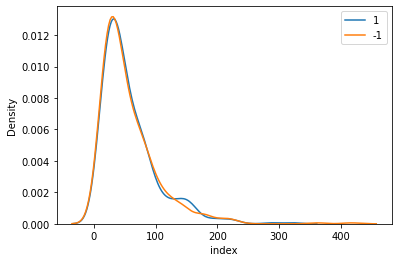

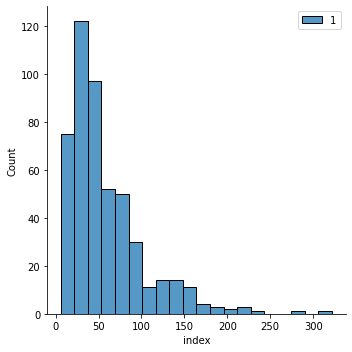

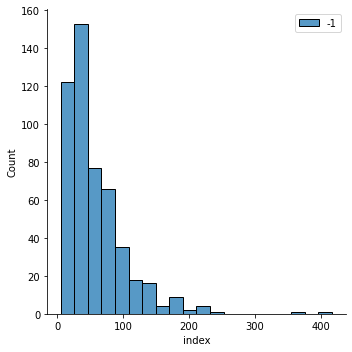

In [28]:
data_10 = make_final_opinions_analysis(model)

------------------

## todos influenciam todos
## probabilidades das opiniões iniciais: (70%, 30%)
## alocação aleatória

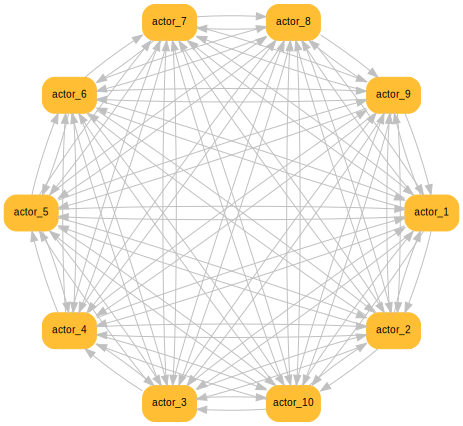

In [18]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'all',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [7/10,3/10],
                              randomize_start_opinions= True,
                              )

model.make_graph()

Numero de runs: 1000

          count       mean  median        std  opinions_prob  random  \
opiniao                                                               
-1         702  43.548433      29  41.695518            0.7    True   
 1         298  71.684564      56  50.425942            0.3    True   

        influence_mode  
opiniao                 
-1                 all  
 1                 all   



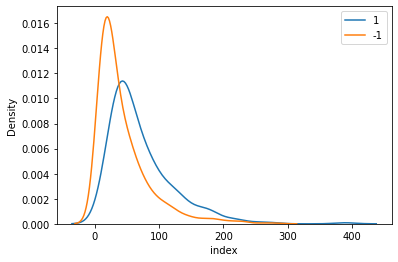

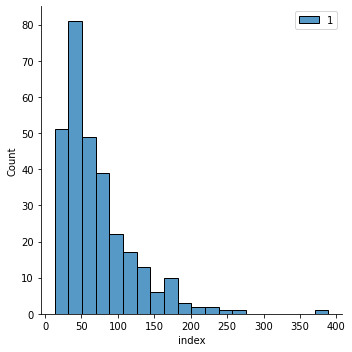

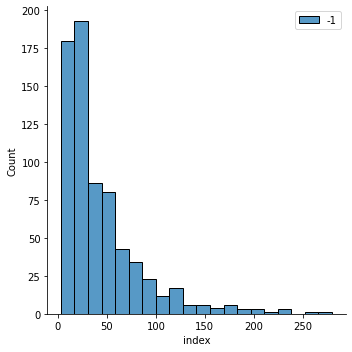

In [30]:
data_11 = make_final_opinions_analysis(model)

------------------

## todos influenciam todos
## probabilidades das opiniões iniciais: (70%, 30%)
## alocação separada

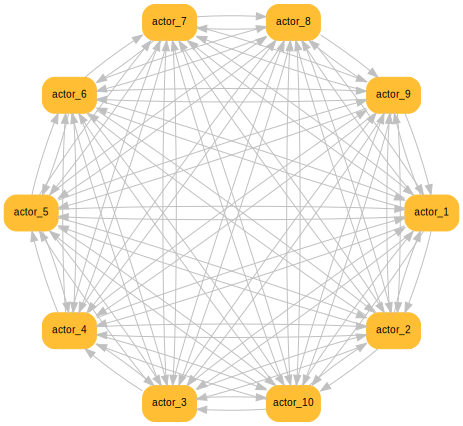

In [19]:
model = models.ModeloVotante(n_actors = 10,
                              influence_mode = 'all',
                              possible_opinions = [-1,1], 
                              opinions_probabilities = [7/10,3/10],
                              randomize_start_opinions= False,
                              )

model.make_graph()

Numero de runs: 1000

          count       mean  median        std  opinions_prob  random  \
opiniao                                                               
-1         720  43.912500    29.0  42.787593            0.7   False   
 1         280  71.264286    58.5  47.133473            0.3   False   

        influence_mode  
opiniao                 
-1                 all  
 1                 all   



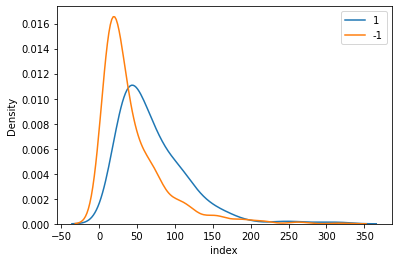

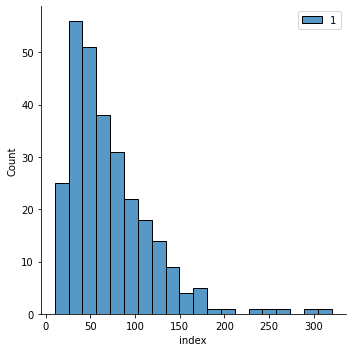

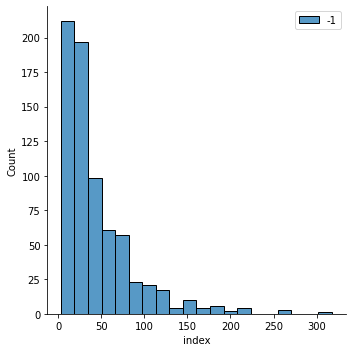

In [32]:
data_12 = make_final_opinions_analysis(model)

In [33]:
results = [data_1[1],
            data_2[1],
            data_3[1],
            data_4[1],
            data_5[1],
            data_6[1],
            data_7[1],
            data_8[1],
            data_9[1],
            data_10[1],
            data_11[1],
            data_12[1]
          ]


df = pd.concat(results)

df.to_csv('../data/results/aula1.csv')

In [ ]:
df = pd.read_csv('../data/results/aula1.csv').iloc[:,1:]

In [36]:
df[df.opinions_prob == 0.5].sort_values('mean')

,opiniao,count,mean,median,std,opinions_prob,random,influence_mode
0,-1,504,56.099206,43.0,45.719193,0.5,True,all
0,-1,509,56.960707,43.0,46.795526,0.5,False,all
1,1,491,57.723014,44.0,45.033464,0.5,False,all
1,1,496,62.945565,45.0,54.171101,0.5,True,all
1,1,517,106.367505,80.0,94.038506,0.5,True,circular_neighbors
0,-1,483,110.942029,84.0,92.960086,0.5,True,circular_neighbors
0,-1,495,116.006061,88.0,94.079205,0.5,False,circular_neighbors
1,1,505,122.562376,98.0,94.206969,0.5,False,circular_neighbors
1,1,491,144.181263,101.0,135.067291,0.5,True,linear_neighbors
0,-1,509,164.836935,105.0,173.298440,0.5,True,linear_neighbors


In [41]:
df[df.opinions_prob.isin([0.3,0.7])].sort_values(['mean'])

,opiniao,count,mean,median,std,opinions_prob,random,influence_mode
0,-1,702,43.548433,29.0,41.695518,0.7,True,all
0,-1,720,43.912500,29.0,42.787593,0.7,False,all
1,1,280,71.264286,58.5,47.133473,0.3,False,all
1,1,298,71.684564,56.0,50.425942,0.3,True,all
0,-1,680,75.977941,41.5,94.338786,0.7,True,circular_neighbors
0,-1,701,91.649073,52.0,101.116296,0.7,False,circular_neighbors
0,-1,711,99.457103,44.0,134.828981,0.7,True,linear_neighbors
1,1,320,137.471875,110.5,100.269195,0.3,True,circular_neighbors
0,-1,738,138.127371,80.0,153.929957,0.7,False,linear_neighbors
1,1,299,148.903010,118.0,108.384324,0.3,False,circular_neighbors


In [49]:
df[df.opinions_prob.isin([0.5])].groupby('opiniao').mean()

,count,mean,median,std,opinions_prob,random
opiniao,,,,,,
-1,500.5,118.515575,87.666667,102.448016,0.5,0.5
1,499.5,115.358659,85.000000,98.516492,0.5,0.5


In [51]:
df[df.opinions_prob.isin([0.3,0.7])].groupby('opiniao').mean()

,count,mean,median,std,opinions_prob,random
opiniao,,,,,,
-1,708.666667,82.112070,45.916667,94.782855,0.7,0.5
1,291.333333,148.746279,116.083333,110.207305,0.3,0.5


É possível observar que:

- existe uma relação entre a distribuição de opiniões iniciais e a convergência para uma determinada opinião. Pelos exemplos acima, mantem-se praticamente a mesma proporção entre opiniões iniciais e opinião de consenso após convergência. Quando atores com opiniões -1 possuem a mesma quantidade de atores com opinião 1, 50% das corridas, aproximadamente, tem consenso final em cada opinião. Quando a probabilidade de atribuição de uma opinão muda (caso estudado - 0.7 e 0.3) o numero de corridas que tem consenso na primeira opinião é proximo a 70%.
- Quando existe um desbalanço inicial de opiniões, a média de tempo para convergir para a opinião com maior numero de atores é menor do que o tempo para convergir para a opinião dividida entre menos atores
- Mantendo a proporção de opiniões fixas, o modelo que todos os atores influenciam todos é o que converge mais rápido, seguido pela configuração que todos estão em um circulo e por útlimo a configuração onde estão em fila.
- corridas com opiniões distribuídas randomicamente entre os atores tendem a convergir mais rápido do que quando há segregação de opiniões, para configurações que só existe interações entre vizinhos.


In [24]:
df

,opiniao,count,mean,median,std,opinions_prob,random,influence_mode
0,-1,509,164.836935,105.0,173.298440,0.5,True,linear_neighbors
1,1,491,144.181263,101.0,135.067291,0.5,True,linear_neighbors
2,-1,503,206.248509,163.0,161.835647,0.5,False,linear_neighbors
3,1,497,198.372233,142.0,168.581619,0.5,False,linear_neighbors
4,-1,711,99.457103,44.0,134.828981,0.7,True,linear_neighbors
5,1,289,194.543253,149.0,155.471703,0.3,True,linear_neighbors
6,-1,738,138.127371,80.0,153.929957,0.7,False,linear_neighbors
7,1,262,268.610687,204.5,199.559191,0.3,False,linear_neighbors
8,-1,483,110.942029,84.0,92.960086,0.5,True,circular_neighbors
9,1,517,106.367505,80.0,94.038506,0.5,True,circular_neighbors


In [23]:
df.groupby(['influence_mode', 'random', 'opinions_prob', 'opiniao']).mean()

count        mean  median  \
influence_mode     random opinions_prob opiniao                              
all                False  0.3            1         280   71.264286    58.5   
                          0.5           -1         509   56.960707    43.0   
                                         1         491   57.723014    44.0   
                          0.7           -1         720   43.912500    29.0   
                   True   0.3            1         298   71.684564    56.0   
                          0.5           -1         504   56.099206    43.0   
                                         1         496   62.945565    45.0   
                          0.7           -1         702   43.548433    29.0   
circular_neighbors False  0.3            1         299  148.903010   118.0   
                          0.5           -1         495  116.006061    88.0   
                                         1         505  122.562376    98.0   
                          0.7           -1         701   91.649073    52.0   
                   True   0.3            1         320  137.471875   110.5   
                          0.5           -1         483  110.942029    84.0   
                                         1         517  106.367505    80.0   
                          0.7           -1         680   75.977941    41.5   
linear_neighbors   False  0.3            1         262  268.610687   204.5   
                          0.5           -1         503  206.248509   163.0   
                                         1         497  198.372233   142.0   
                          0.7           -1         738  138.127371    80.0   
                   True   0.3            1         289  194.543253   149.0   
                          0.5           -1         509  164.836935   105.0   
                                         1         491  144.181263   101.0   
                          0.7           -1         711   99.457103    44.0   

                                                        std  
influence_mode     random opinions_prob opiniao              
all                False  0.3            1        47.133473  
                          0.5           -1        46.795526  
                                         1        45.033464  
                          0.7           -1        42.787593  
                   True   0.3            1        50.425942  
                          0.5           -1        45.719193  
                                         1        54.171101  
                          0.7           -1        41.695518  
circular_neighbors False  0.3            1       108.384324  
                          0.5           -1        94.079205  
                                         1        94.206969  
                          0.7           -1       101.116296  
                   True   0.3            1       100.269195  
                          0.5           -1        92.960086  
                                         1        94.038506  
                          0.7           -1        94.338786  
linear_neighbors   False  0.3            1       199.559191  
                          0.5           -1       161.835647  
                                         1       168.581619  
                          0.7           -1       153.929957  
                   True   0.3            1       155.471703  
                          0.5           -1       173.298440  
                                         1       135.067291  
                          0.7           -1       134.828981